<img style="float:top,right" src="Logo.png" width="400">

<br><br>

# Welcome to the KinMS example notebook  

<br><br>

### Here you will learn how to import and use KinMS to generate interferometric data cubes and gain a better understanding of using the functionalities within the package.

---

Copyright (C) 2016, Timothy A. Davis
E-mail: DavisT -at- cardiff.ac.uk

---


### HOUSEKEEPING

Firstly, we want to import the KinMS package and instantiate the class so that we can freely use it throughout this example notebook.

In [1]:
from TimMS import KinMS

Instantiate the model

In [2]:
f = KinMS()

Lastly we're going to need some more basic Python packages as well as the premade colourmap for viewing velocity maps found in $\texttt{sauron_colormap}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sauron_colormap import sauron

---

## Example 1.

### Lets try making a data cube by providing the class with the physical attributes necessary for descibing a simple exponential disk. 

First lets start by creating a surface brightness profile which decays radially.

In [4]:
scalerad = 10.
x=np.arange(0, 100, 0.1)
fx = np.exp(-x / scalerad)

Next, lets make the velocity profile.

In [5]:
vel = np.arctan(x)
vel*=(210 / vel.max()) # Scaling the maximum velocity to 210 km/s

Although not necessary, we may also wish to provide our class with the position angle and inclination angle of our galaxy. We do that here by defining $\texttt{pos}$ and $\texttt{inc}$ respectively.

In [6]:
pos = 90
inc= 45

Now we need to define the properties of the data cube which we would like to return, including the physical dimensions, channel width, and beam size.

In [14]:
xsize=128
ysize=128
vsize=1400
cellsize=1
dv=10
beamsize=[4., 4., 0.]

Finally, we provide all of the parameters defined above to the class which returns the modelled data cube. 

In [15]:
cube = f(xsize,ysize,vsize,cellsize,dv,beamSize=beamsize,inc=inc,sbProf=fx,
             sbRad=x,velProf=vel, posAng=pos,verbose=False)        

If we create moment 0 and moment 1 maps from the datacube we can get a good idea of the shape and velocity characteristics of the galaxy we just created. To do this, we'll create a plotting routine function that we can use throughout this script. 

In [18]:
def plotting_routine(cube, dv, vel):
    
    cube[cube < 1*cube.std()] = np.nan
    
    mom0 = np.nansum(cube, axis=2)
    mom0[mom0 == 0] = np.nan
    mom1 = np.nansum((cube*np.linspace(vel.min(), vel.max(), cube.shape[2])), axis=2) / np.nansum(cube, axis=2)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(mom0, cmap='magma_r')
    axs[1].imshow(mom1, cmap=sauron)

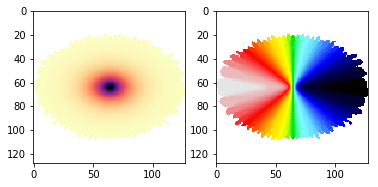

In [19]:
plotting_routine(cube,10,vel)

---

## Example 2.
